Nama : Annisa Putri Aulia
Nim : H071191029
Tugas02 Machine Learning


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv('winequality-red.csv',sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
df.dropna(inplace=True)
data = df.reset_index(drop=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
from sklearn.preprocessing import StandardScaler

df_scale = data.copy()
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_scale)
len(df_scale)

1599

In [23]:
data = pd.DataFrame(df_scale)
data.columns = df.columns
data_cluster = data.copy()
data.head()
data.shape

(1599, 12)

Text(0, 0.5, 'Inertia')

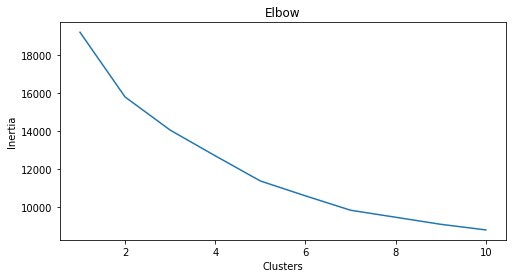

In [24]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [25]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans3.fit(data)
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_kmeans3
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,1
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823,0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848,0
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848,0
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' KMeans 3 cluster')

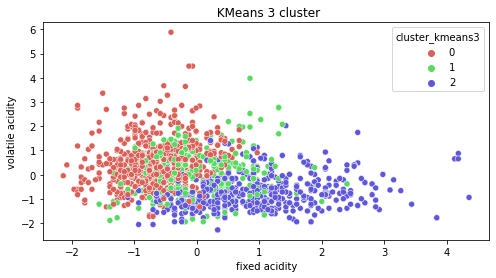

In [26]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['fixed acidity'], data_cluster['volatile acidity'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

Algoritma K-MEDOIDS

In [27]:

from sklearn_extra.cluster import KMedoids

In [28]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)
data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_kmeans3,Cluster K-Medoids
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,1,3
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0,3
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,2,3
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823,0,2
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848,0,2
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848,0,2
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823,0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


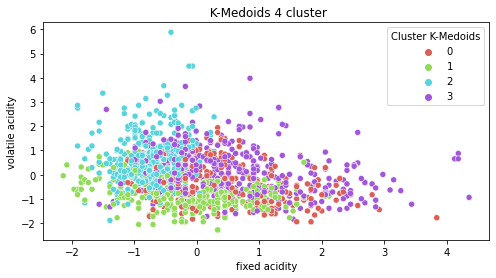

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['fixed acidity'], data_cluster['volatile acidity'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()

Hierarchy

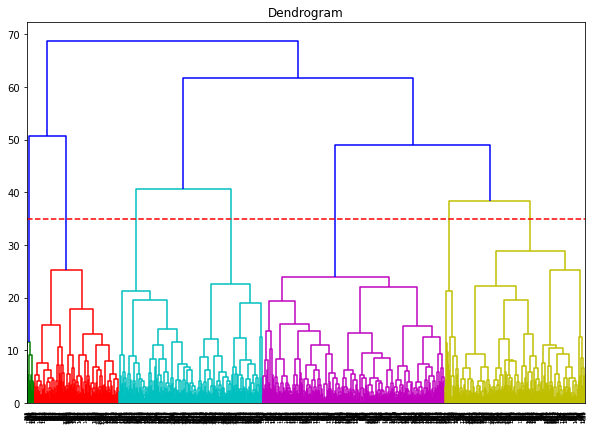

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

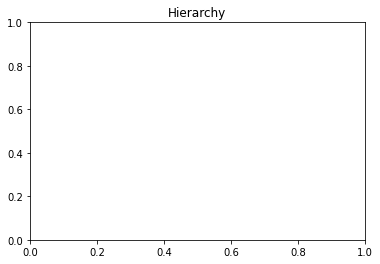

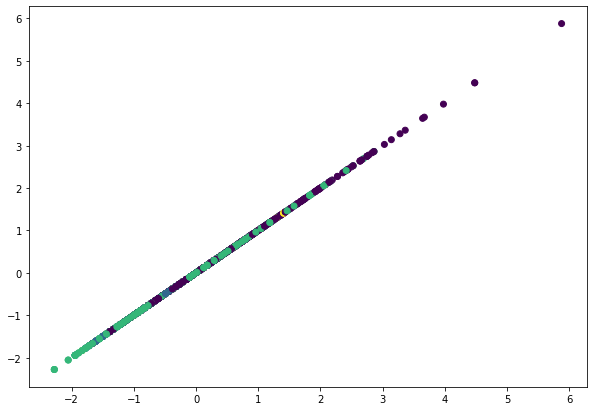

In [31]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data)
plt.title('Hierarchy')
plt.figure(figsize=(10,7))
plt.scatter(data_cluster['volatile acidity'], data_cluster['volatile acidity'], c=model_agglo.labels_)

DBSCAN

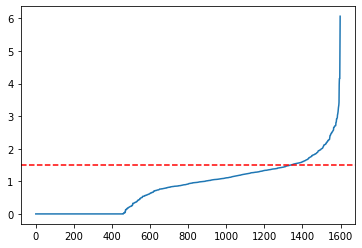

In [32]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

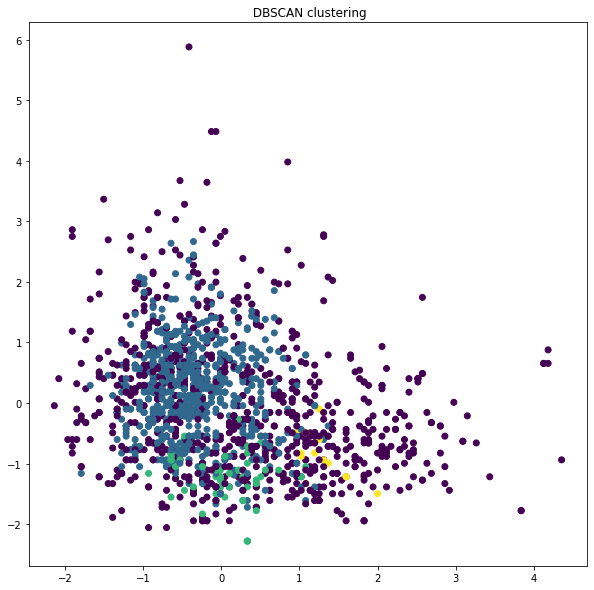

In [33]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.5, min_samples=13)
model_dbscan.fit(data)
plt.figure(figsize=(10,10))
plt.scatter(data_cluster['fixed acidity'], data_cluster['volatile acidity'], c=model_dbscan.labels_)
plt.title(' DBSCAN clustering')
plt.show()